### Student Performance EDA

#### Life-cycle of ML
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* EDA
* Data Pre-processing
* Model Training
* Choose best model

### 1) Problem Statement
* Understand how a student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch, and Test Preparation course.

### 2) Data Collection
* Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* Data consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [13]:
df.shape

(1000, 8)

### 2.2 Dataset Information
* gender: sex of students -> (Male/female)
* race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
* parental level of education: parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch: having lunch before test (standard of free/reduced)
* test preparation course: complete or note complete before test
* math score
* reading score
* writing score

### 3. Data Checks to perform
* Check Missing Values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No missing values in the data set

### 3.2 Check Duplicates

In [15]:
df.duplicated().sum()

0

No duplicate values in the data set

### 3.3 Check data types

In [16]:
# Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [17]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.7 Exploring Data

In [19]:
print("Categories in 'gender' variable: ", end = '')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end = '')
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = '')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = '')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = '')
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [20]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'. format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [21]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['math score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Writing: 14


In [23]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
* From above values, we get students have performed the worst in Maths
* Best performance is in reading

### 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

#### 4.1.1 Histogram and KDE

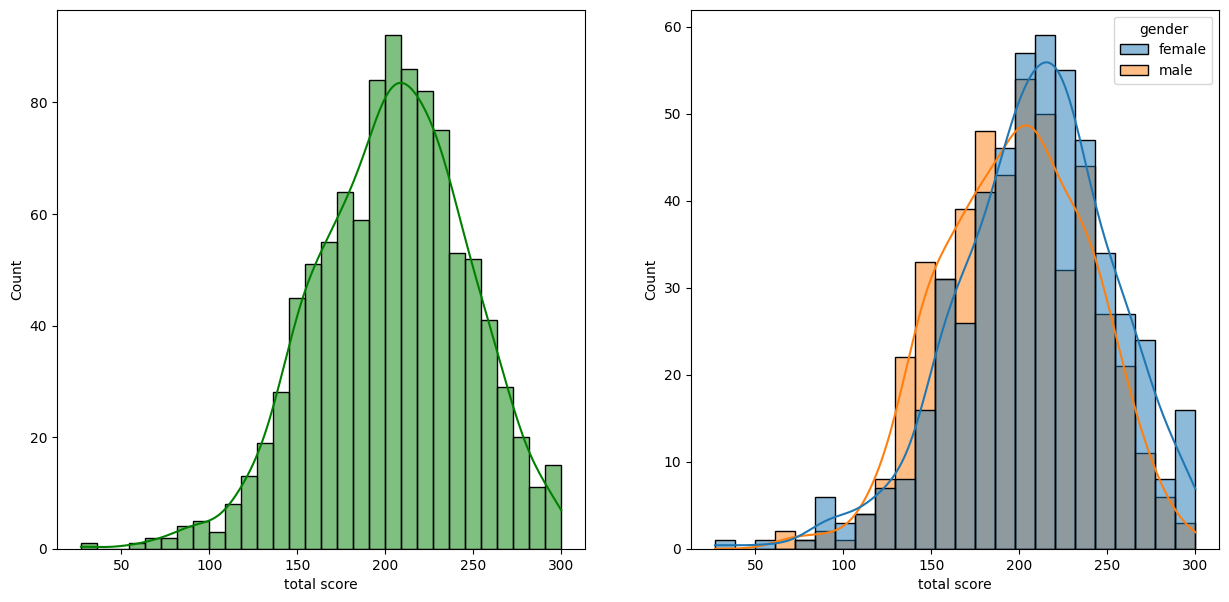

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

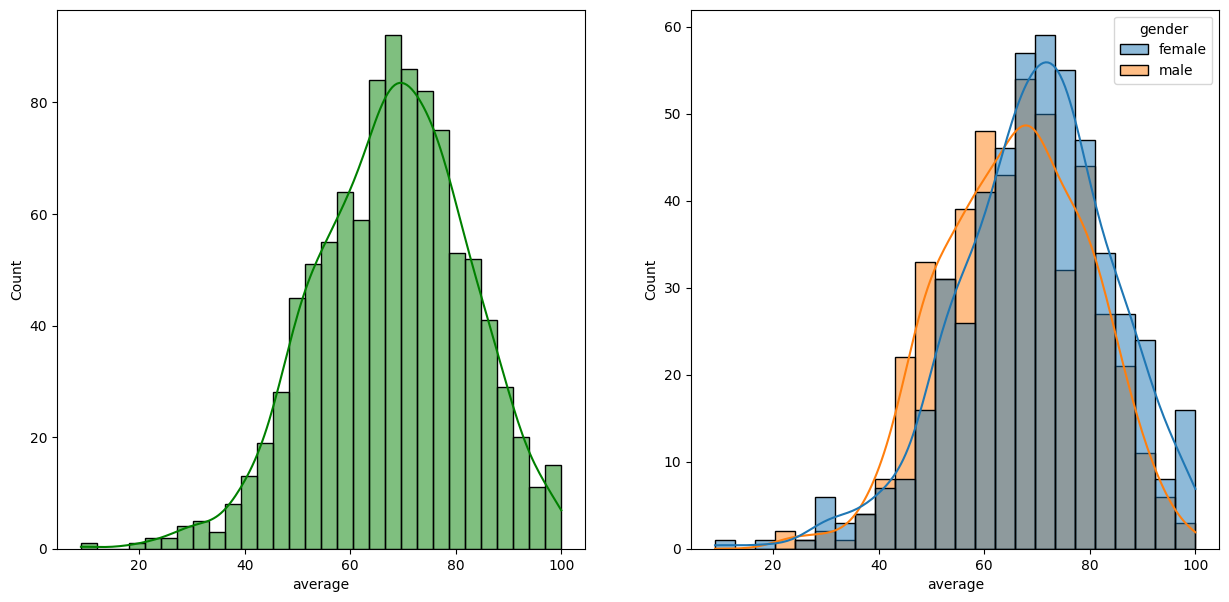

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

#### Insights

* Female students tend to perform well than male students.

<function matplotlib.pyplot.show(close=None, block=None)>

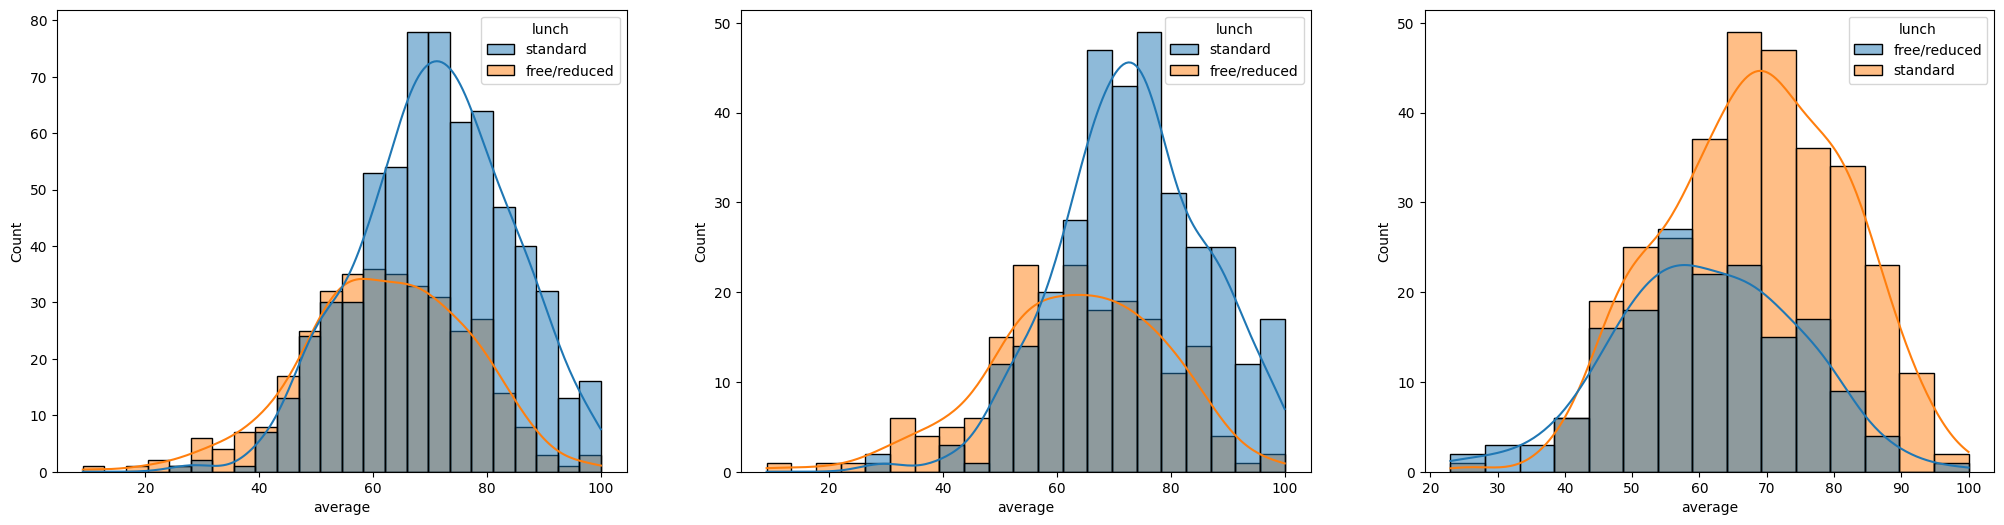

In [26]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show

#### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams for both male and female.

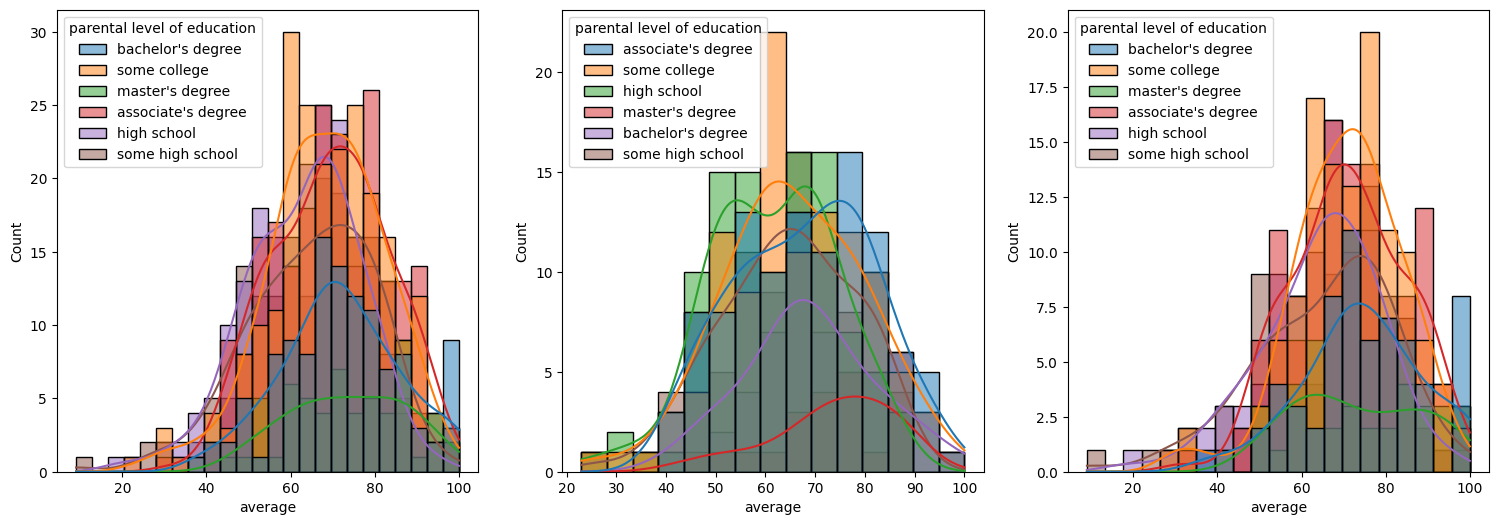

In [27]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

#### Insights

* Parental level of education does not really help students perform well in exam
* 3rd plot we see almost no effect of parental level of education on female students

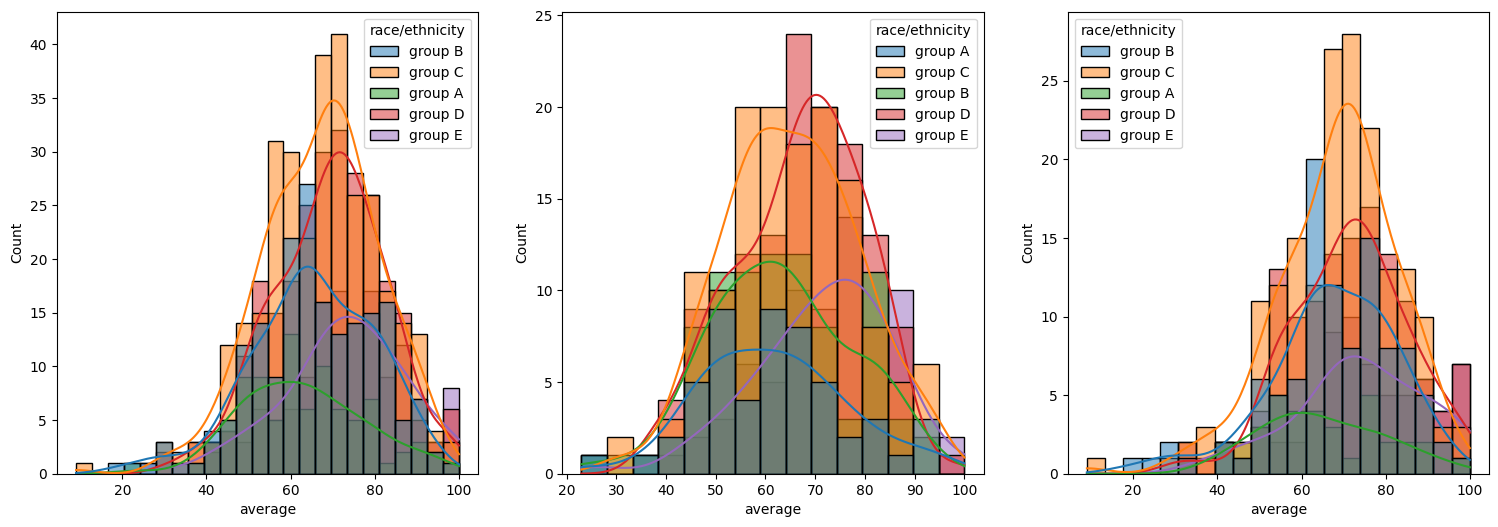

In [28]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

#### Insights

* Group A and Group B students perform poorly in exam
* Group A and B students perform pooly be it male or female

#### 4.2 Maximum score of students in all three subjects

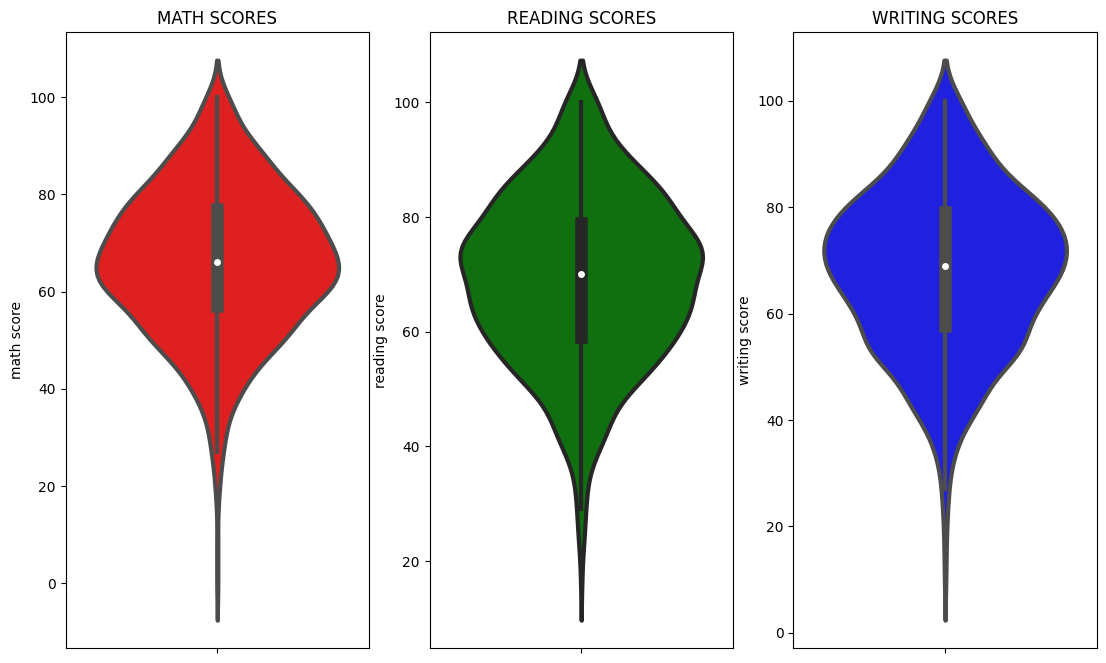

In [29]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y = 'reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y = 'writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

#### Insights

* From above plot, most students' scores in Math are between 60 - 80 where as its 50 - 80 in writing and reading.

### Multivariate analysis using pieplot

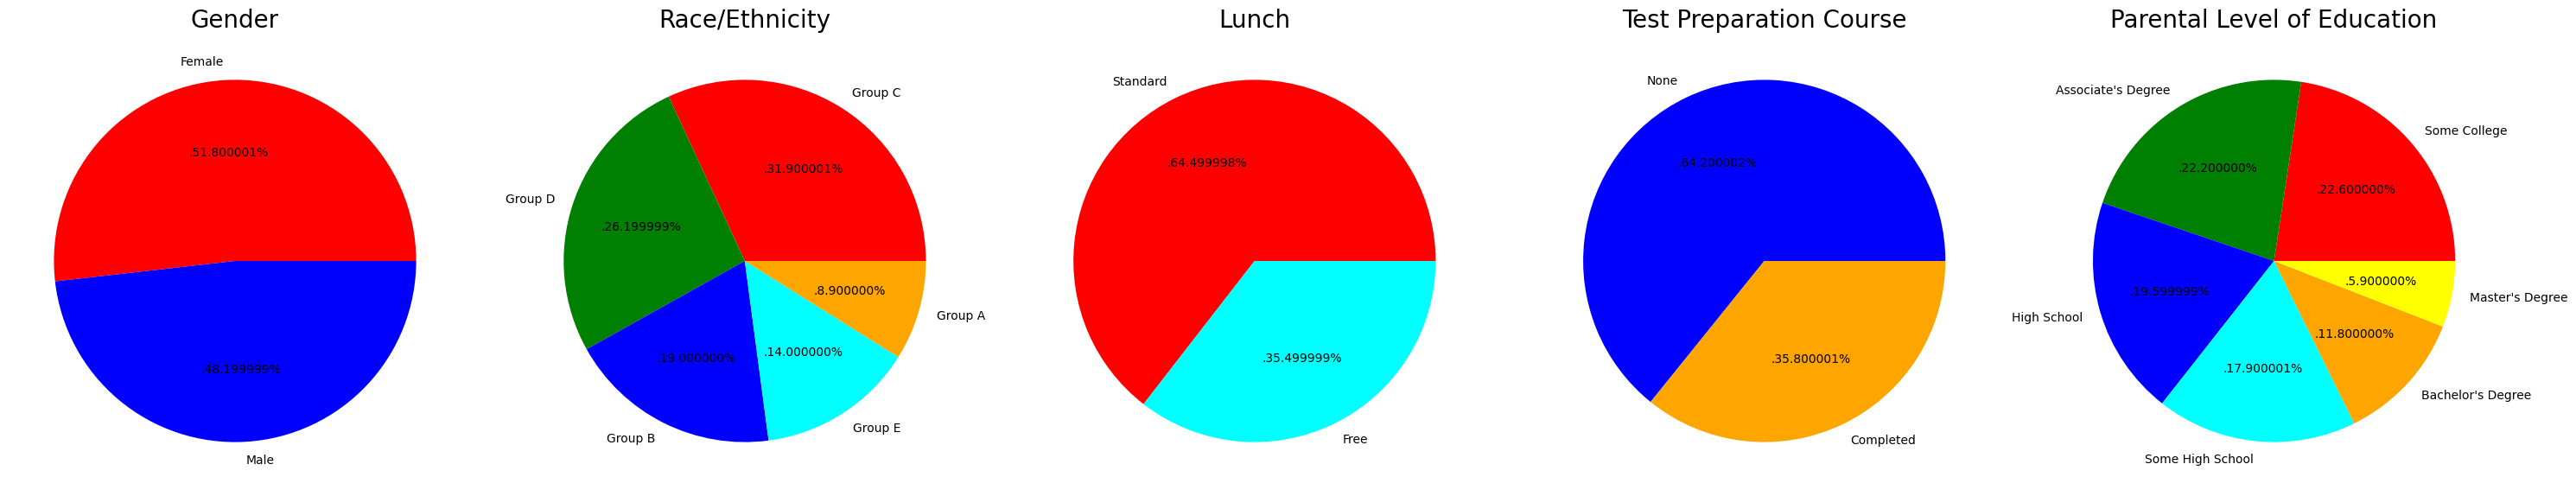

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'blue']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'cyan']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['blue', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'yellow']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights

* Number of male and female students is almost equal
* Number of students are greatest in Group C
* Number of students that have standard lunch are greater
* Number of students that do not have any test preparation course is higher
* Number of students whose parental education is "Some College" is greater followed by "Associate's Degree"

#### 4.4 Feature-wise Visualization

#### 4.4.1 GENDER
* Distribution of Gender
* Impact of Gender on student's performance

#### Univariate Analysis

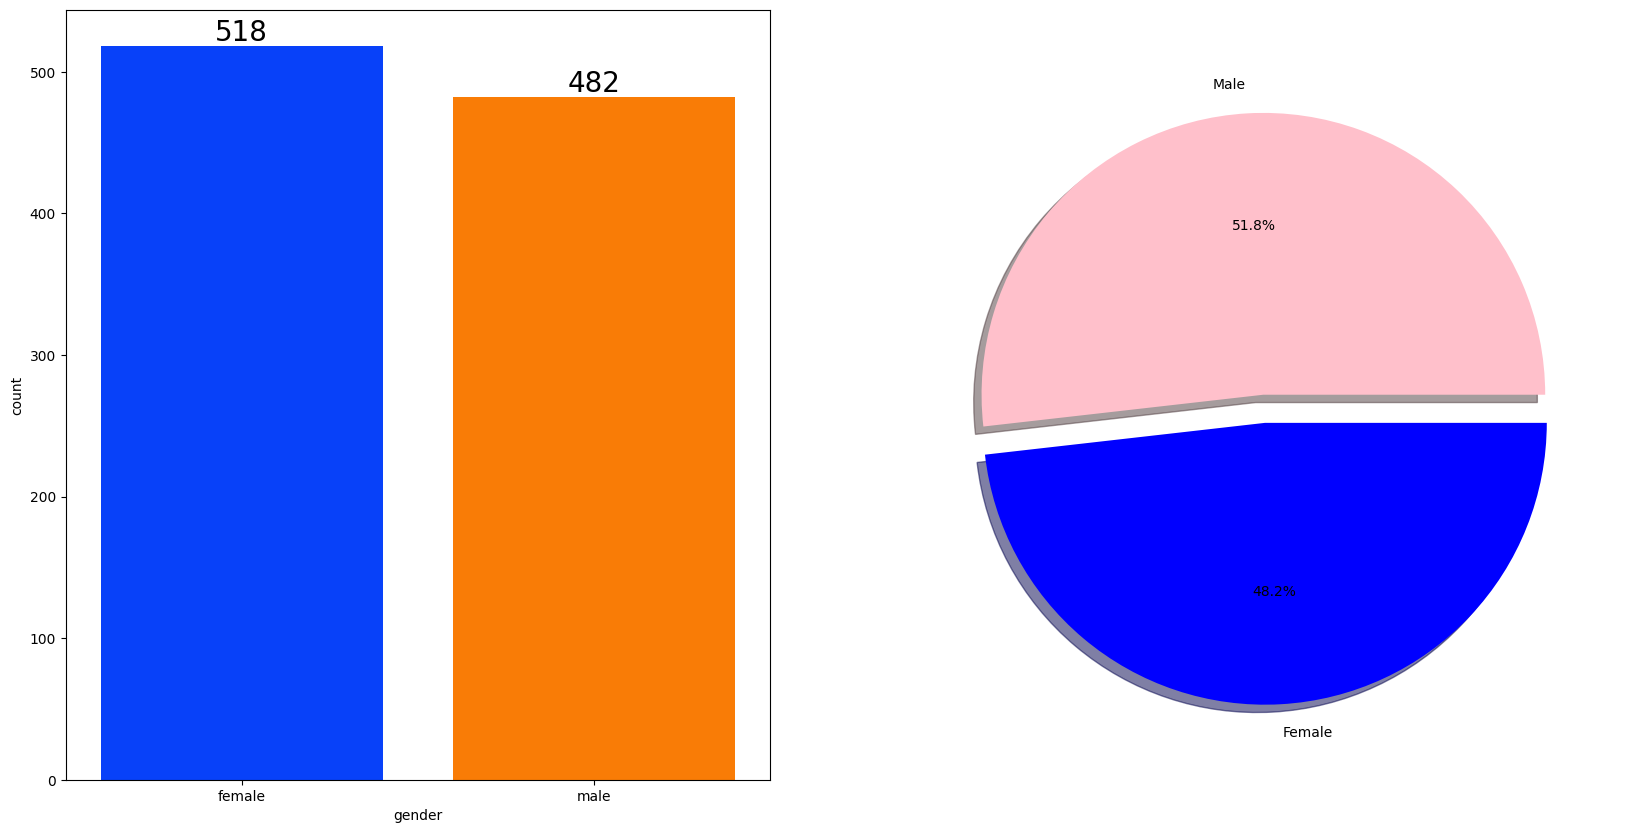

In [31]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(data = df, x = df['gender'], palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x = df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['pink', 'blue'])
plt.show()

#### Insights

* Balanced data in Gender with male 482 and female 518

#### Bivariate Analysis

In [32]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


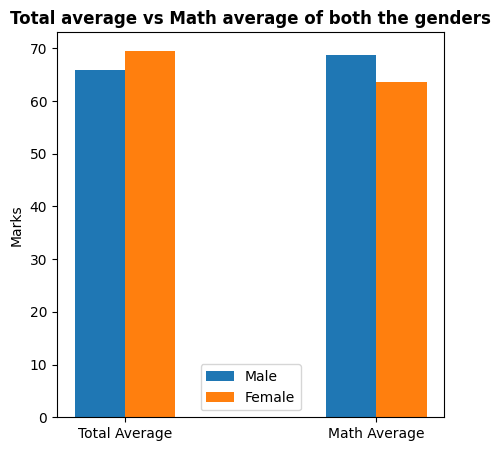

In [33]:
plt.figure(figsize = (5, 5))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, male_scores, 0.2, label = 'Male')
plt.bar(X_axis + 0.1, female_scores, 0.2, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average vs Math average of both the genders', fontweight = 'bold')
plt.legend()
plt.show()

#### Insights
* On average, female students have better average than male students
* Males have scored higher in math

#### 4.4.2 Race/Ethnicity Column

* Group-wise Distribution

#### Univariate Analysis

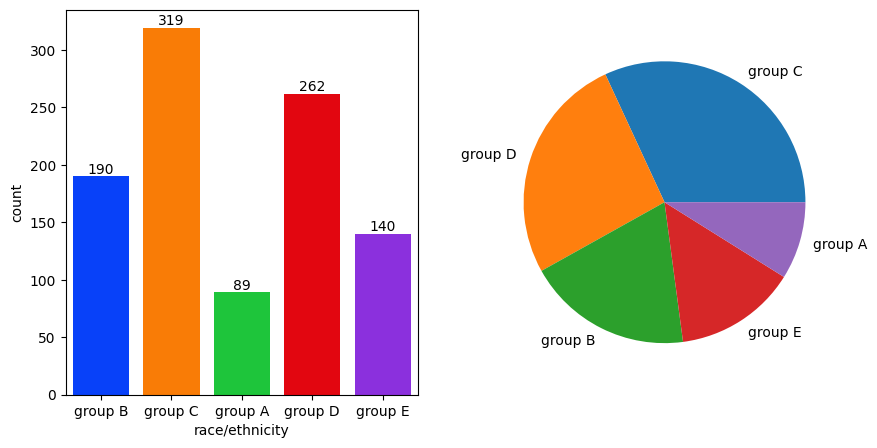

In [34]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(data = df, x = df['race/ethnicity'], palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

plt.pie(x = df['race/ethnicity'].value_counts(), labels = df['race/ethnicity'].value_counts().index)
plt.show()

#### Insights

* Most number of students belong to Group C or Group D
* Lowest number of students from Group A

#### Bivariate Analysis

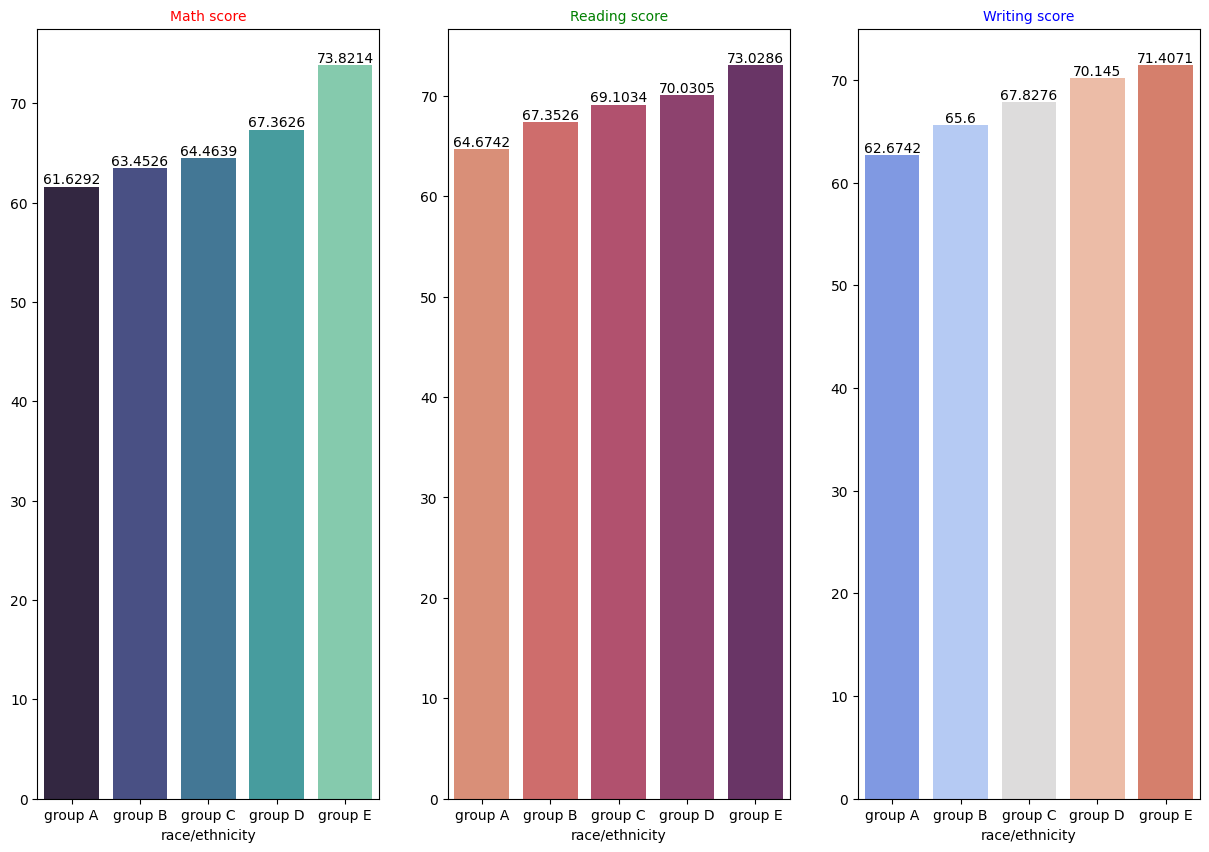

In [35]:
group_data = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize = (15, 10))
sns.barplot(x = group_data['math score'].mean().index, y = group_data['math score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = 'red', size = 10)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

sns.barplot(x = group_data['reading score'].mean().index, y = group_data['reading score'].mean().values, palette = 'flare', ax = ax[1])
ax[1].set_title('Reading score', color = 'green', size = 10)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

sns.barplot(x = group_data['writing score'].mean().index, y = group_data['writing score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing score', color = 'blue', size = 10)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 10)

plt.show()

#### Insights

* Group E students have the highest marks
* Group A students have the lowest marks
* Students from low socioeconomic status have the lower average in all courses

#### 4.4.3 Parental Level of Education Column

#### Univariate Analysis

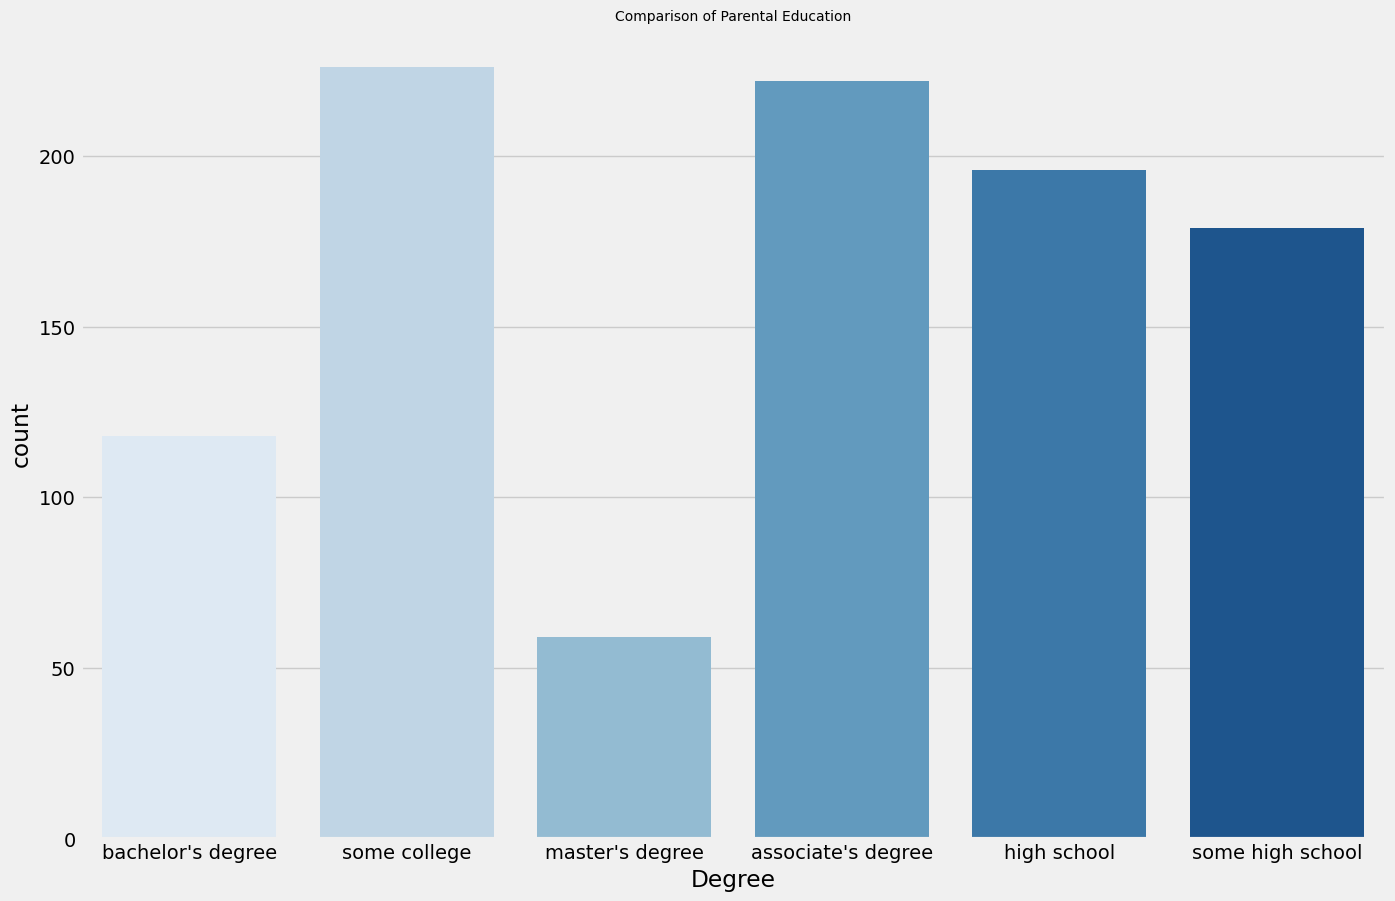

In [36]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
sns.countplot(data = df, x = df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights

* Largest number of parents are from some college.

#### Bivariate analysis

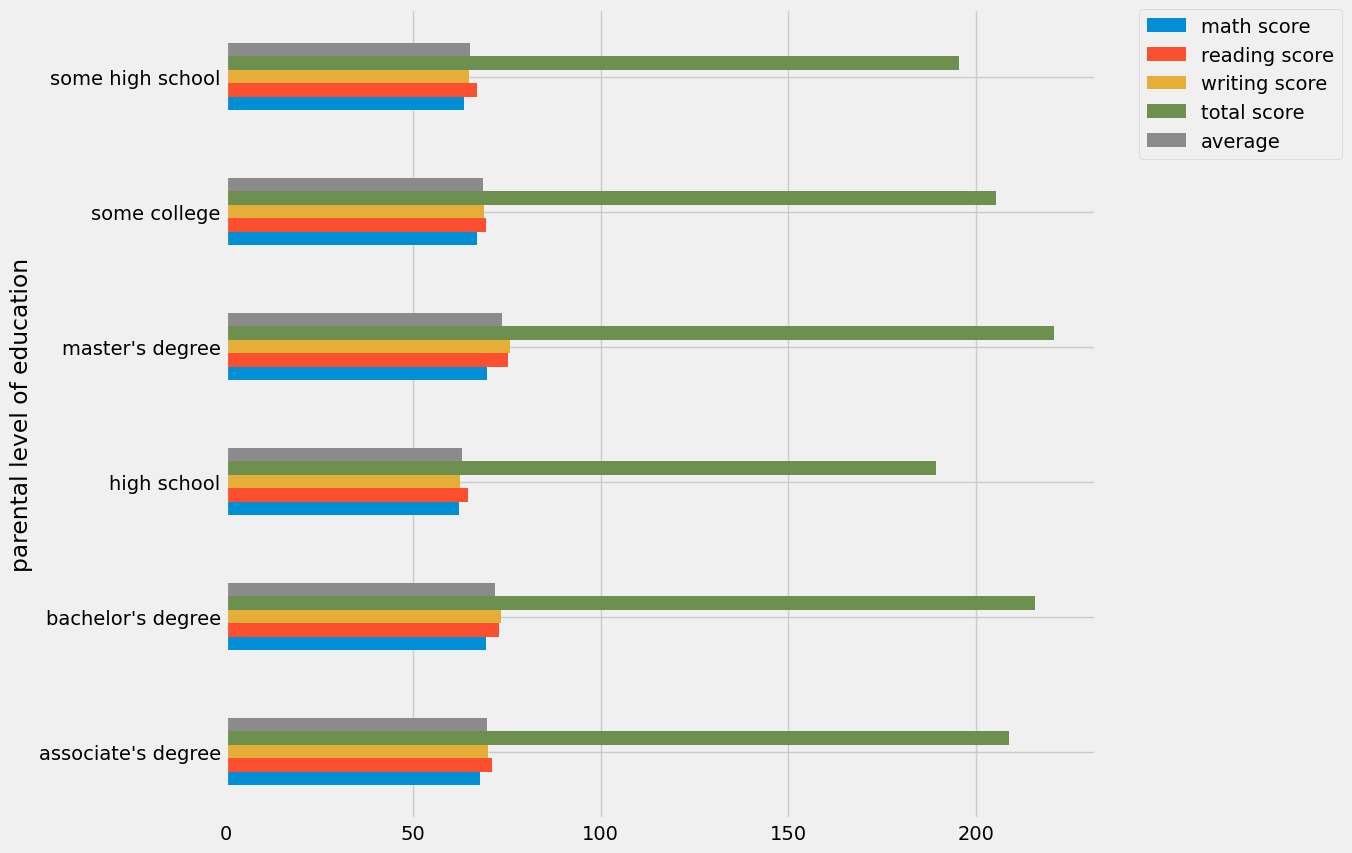

In [37]:
df.groupby('parental level of education').agg('mean').plot(kind = 'barh', figsize = (10, 10))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

#### Insights

* Score of students whose parents possess master's and bachelor's degrees are higher than others

#### 4.4.4 Lunch Column

#### Univariate Analysis

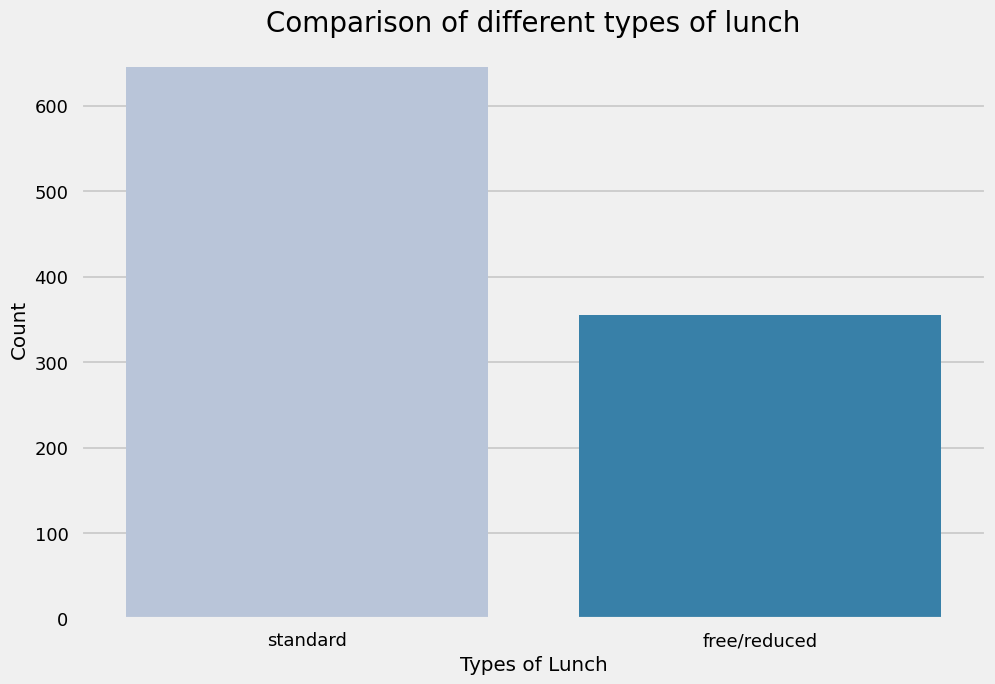

In [39]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('seaborn-talk')
sns.countplot(data = df, x = df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Ingights

* Students being served the standard lunch were more than free/reduced.

#### Bivariate analysis

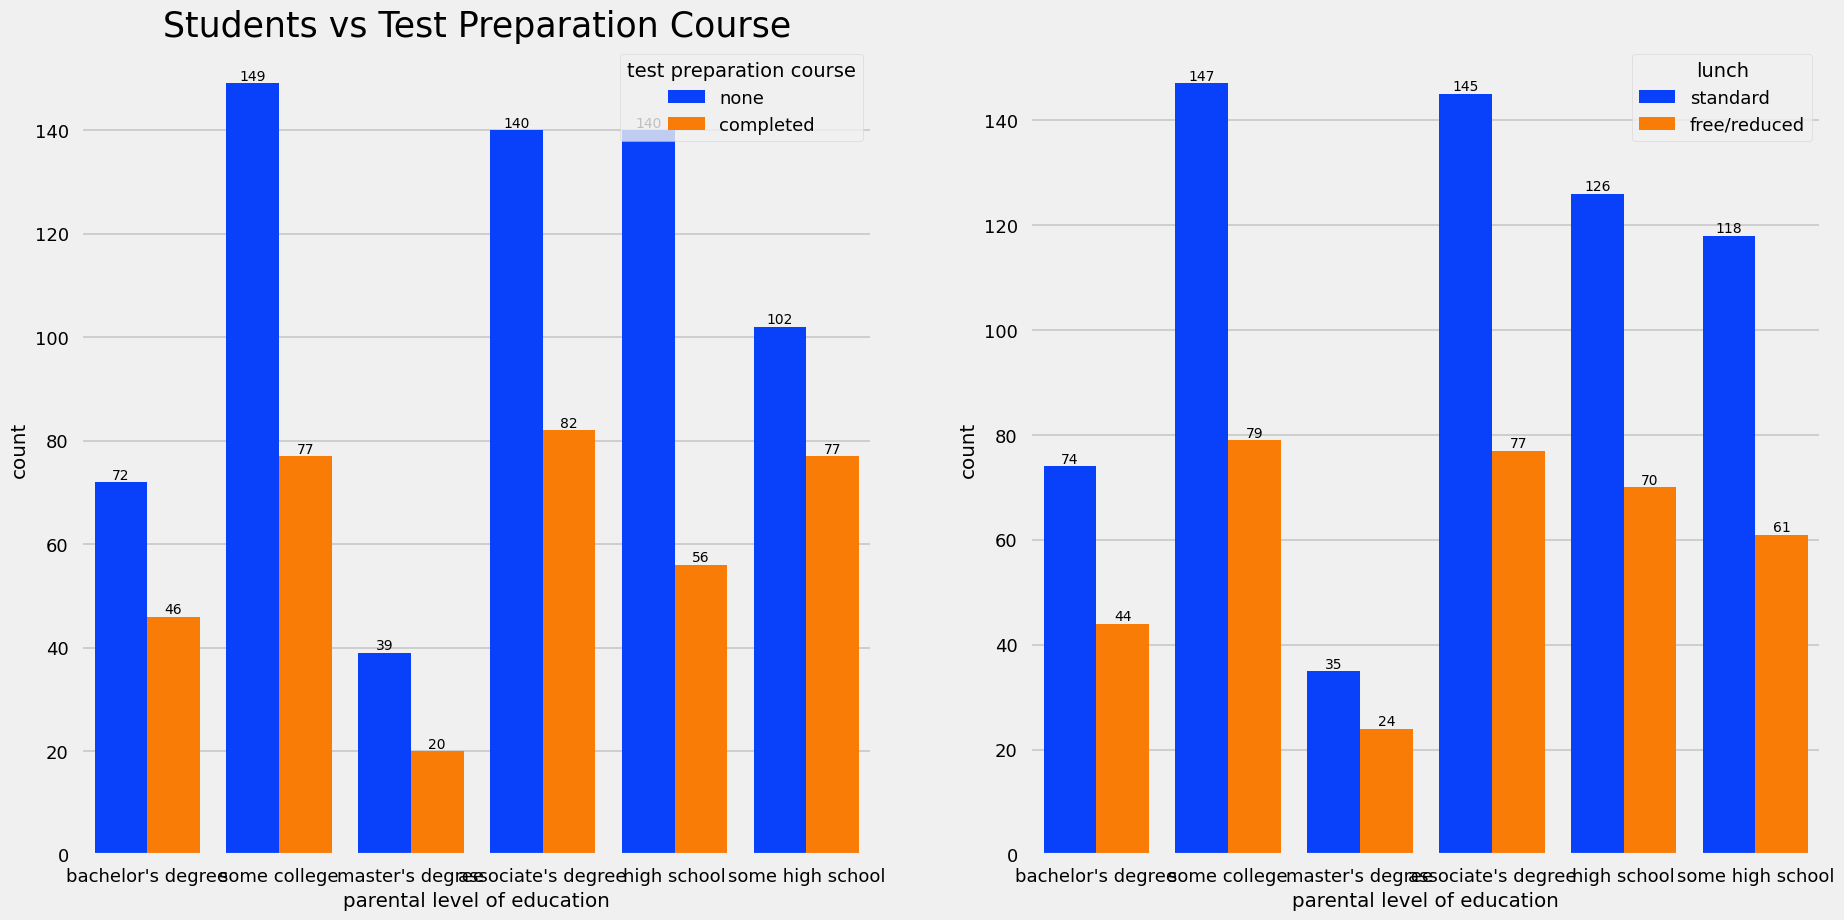

In [41]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(data = df, x = df['parental level of education'], palette = 'bright', hue = 'test preparation course', saturation = 0.95, ax = ax[0])
ax[0].set_title('Students vs Test Preparation Course', color = 'black', size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

sns.countplot(data = df, x = df['parental level of education'], palette = 'bright', hue = 'lunch', saturation = 0.95, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

#### Insights

* Students who get standard lunch and no test preparation course perform better

#### Test Preparation column

#### Bivariate Analysis

<Axes: xlabel='lunch', ylabel='writing score'>

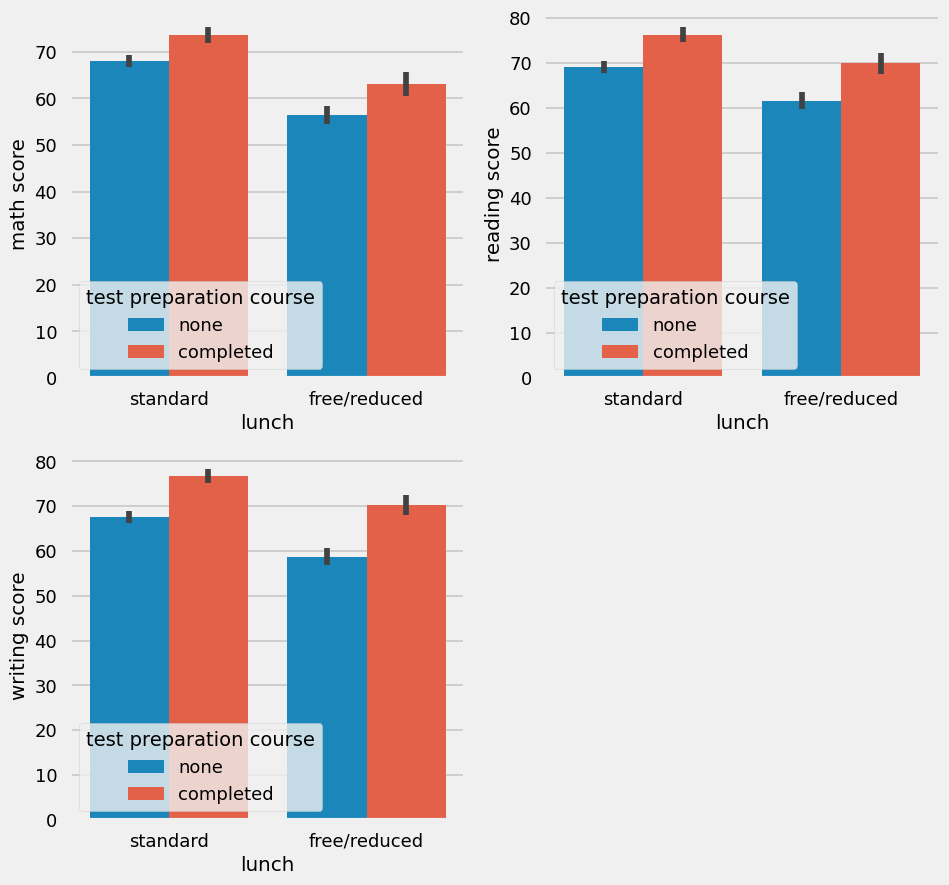

In [42]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = df['lunch'], y = df['math score'], hue = df['test preparation course'])
plt.subplot(2, 2, 2)
sns.barplot(x = df['lunch'], y = df['reading score'], hue = df['test preparation course'])
plt.subplot(2, 2, 3)
sns.barplot(x = df['lunch'], y = df['writing score'], hue = df['test preparation course'])

#### Insights

* Students who have taken Test Preparation course have higher scores in all three than those who haven't.

### Checking Outliers

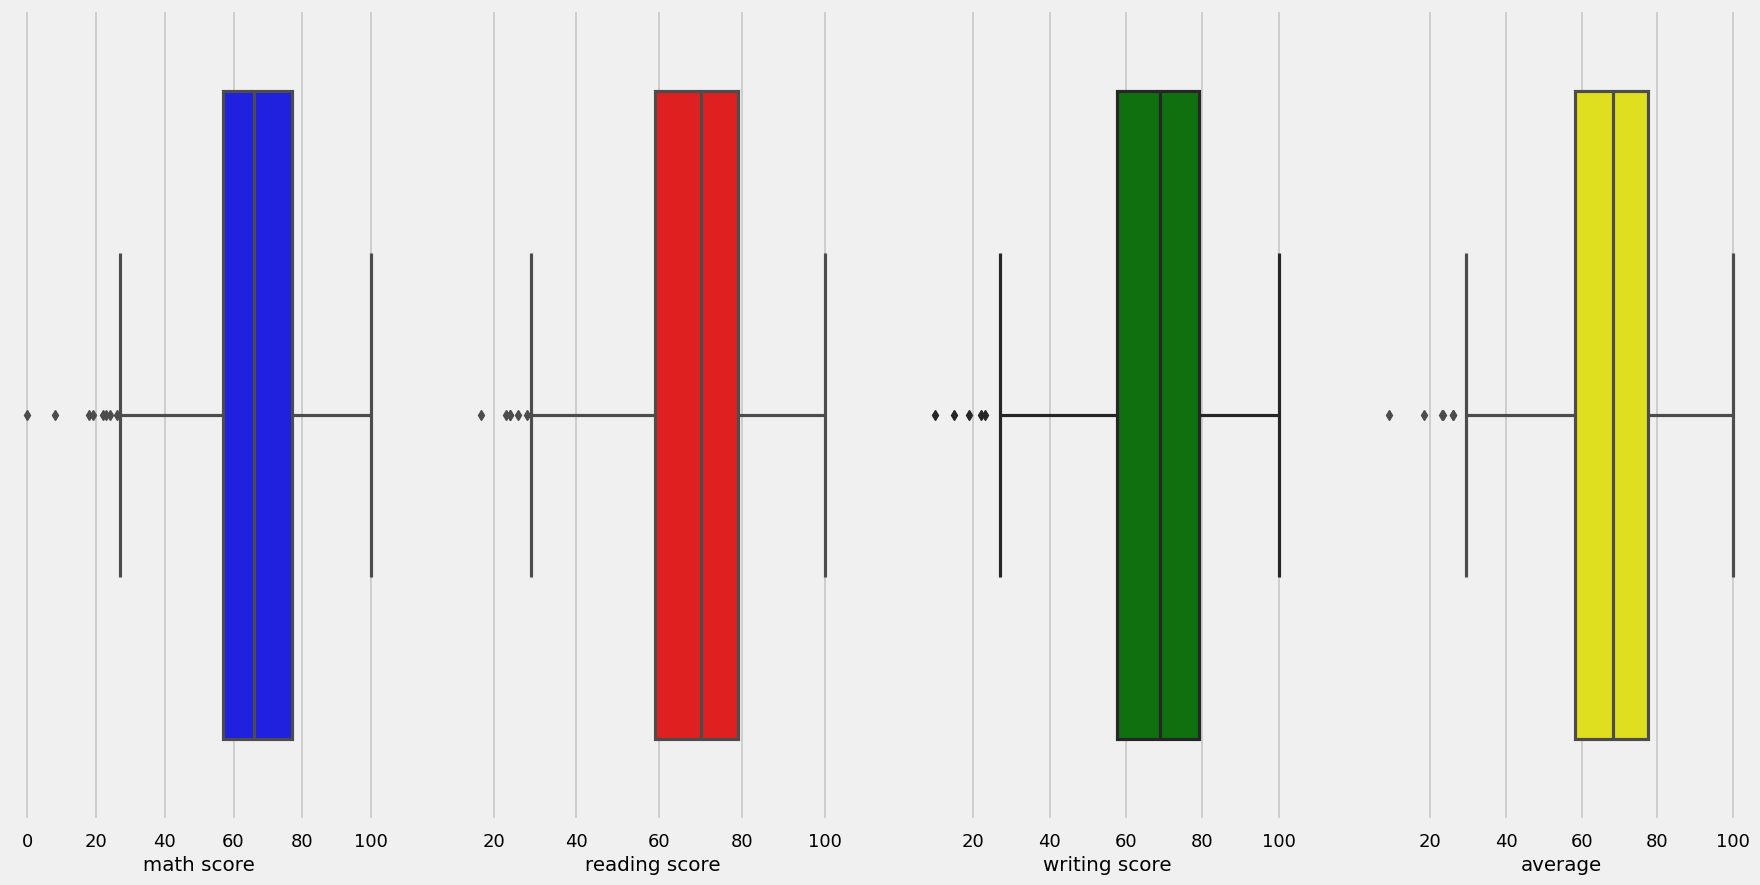

In [43]:
plt.subplots(1, 4, figsize = (20, 10))
plt.subplot(141)
sns.boxplot(data = df, x = df['math score'], color = 'blue')
plt.subplot(142)
sns.boxplot(data = df, x = df['reading score'], color = 'red')
plt.subplot(143)
sns.boxplot(data = df, x = df['writing score'], color = 'green')
plt.subplot(144)
sns.boxplot(data = df, x = df['average'], color = 'yellow')
plt.show()


#### 4.4.7 Multivariate with pairplot

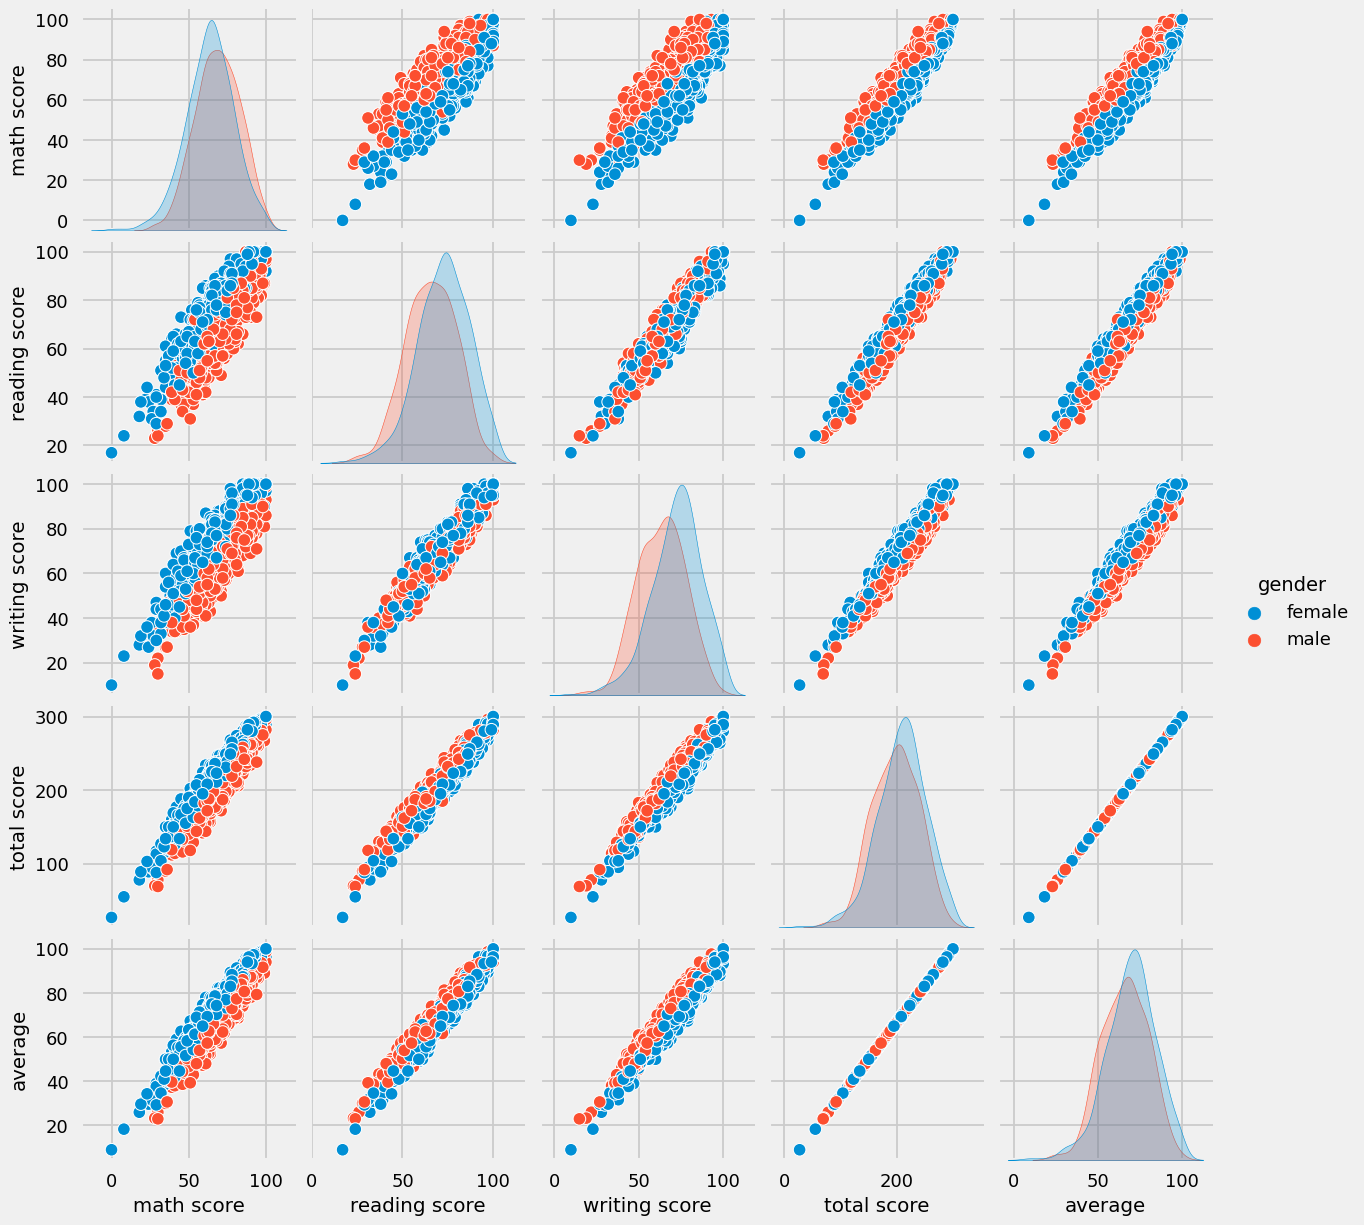

In [44]:
sns.pairplot(data = df, hue = 'gender')
plt.show()

#### Insights

* All scores increase linearly with each other

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level of education
* Females lead in pass percentage and are top-scorers
* Student's Performance is not much affected by the test preparation course
* Finishing preparation course is beneficial.